### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [89]:
total_precio_tienda = tienda['Precio'].sum()
print("Total de precios en tienda  :", total_precio_tienda)
total_precio_tienda2 = tienda2['Precio'].sum()
print("Total de precios en tienda 2:", total_precio_tienda2)
total_precio_tienda3 = tienda3['Precio'].sum()
print("Total de precios en tienda 3:", total_precio_tienda3)
total_precio_tienda4 = tienda4['Precio'].sum()
print("Total de precios en tienda 4:", total_precio_tienda4)
print("="*42)
suma_total_precio = tienda['Precio'].sum() + tienda2['Precio'].sum() + tienda3['Precio'].sum() + tienda4['Precio'].sum()
print("Suma total de precios entre todas las tiendas:", suma_total_precio)

Total de precios en tienda  : 1038375700.0
Total de precios en tienda 2: 1116343500.0
Total de precios en tienda 3: 1098019600.0
Total de precios en tienda 4: 1038375700.0
Suma total de precios entre todas las tiendas: 4291114500.0


# 2. Ventas por categoría

In [116]:
ventas_tienda = tienda.groupby('Categoría del Producto').size()
ventas_tienda2 = tienda2.groupby('Categoría del Producto').size()
ventas_tienda3 = tienda3.groupby('Categoría del Producto').size()
ventas_tienda4 = tienda4.groupby('Categoría del Producto').size()
ventas_por_categoria_df = pd.DataFrame({
    'Tienda': ventas_tienda,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}).fillna(0).astype(int)
ventas_por_categoria_df['Total Categoría'] = ventas_por_categoria_df.sum(axis=1)
print("Ventas por Categoría y Tienda:\n")
print(ventas_por_categoria_df)

Ventas por Categoría y Tienda:

                         Tienda  Tienda 2  Tienda 3  Tienda 4  Total Categoría
Categoría del Producto                                                        
Artículos para el hogar     201       181       177       201              760
Deportes y diversión        277       275       277       277             1106
Electrodomésticos           254       305       278       254             1091
Electrónicos                451       422       451       451             1775
Instrumentos musicales      170       224       177       170              741
Juguetes                    338       313       315       338             1304
Libros                      187       197       185       187              756
Muebles                     480       442       499       480             1901


# 3. Calificación promedio de la tienda


In [49]:
promedio_tienda = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

In [110]:
print(f"Promedio calificaciones Tienda  : {promedio_tienda:.2f}")
print("="*42)
print(f"Promedio calificaciones Tienda 2: {promedio_tienda2:.2f}")
print("="*42)
print(f"Promedio calificaciones Tienda 3: {promedio_tienda3:.2f}")
print("="*42)
print(f"Promedio calificaciones Tienda 4: {promedio_tienda4:.2f}")

Promedio calificaciones Tienda  : 23459.46
Promedio calificaciones Tienda 2: 25216.24
Promedio calificaciones Tienda 3: 24805.68
Promedio calificaciones Tienda 4: 23459.46


# 4. Productos más y menos vendidos

In [115]:
ventas_por_producto = tienda.groupby('Producto').size().sort_values(ascending=False)
print("Tienda - Ventas por producto:")
producto_mas_vendido = ventas_por_producto.idxmax()
producto_menos_vendido = ventas_por_producto.idxmin()
print(f" Producto más vendido: {producto_mas_vendido} ({ventas_por_producto.max()} ventas)")
print(f" Producto menos vendido: {producto_menos_vendido} ({ventas_por_producto.min()} ventas)")
print("="*42)
ventas_por_producto = tienda2.groupby('Producto').size().sort_values(ascending=False)
print("Tienda 2 - Ventas por producto:")
producto_mas_vendido = ventas_por_producto.idxmax()
producto_menos_vendido = ventas_por_producto.idxmin()
print(f" Producto más vendido: {producto_mas_vendido} ({ventas_por_producto.max()} ventas)")
print(f" Producto menos vendido: {producto_menos_vendido} ({ventas_por_producto.min()} ventas)")
print("="*42)
ventas_por_producto = tienda3.groupby('Producto').size().sort_values(ascending=False)
print("Tienda 3 - Ventas por producto:")
producto_mas_vendido = ventas_por_producto.idxmax()
producto_menos_vendido = ventas_por_producto.idxmin()
print(f" Producto más vendido: {producto_mas_vendido} ({ventas_por_producto.max()} ventas)")
print(f" Producto menos vendido: {producto_menos_vendido} ({ventas_por_producto.min()} ventas)")
print("="*42)
ventas_por_producto = tienda4.groupby('Producto').size().sort_values(ascending=False)
print("Tienda 4 - Ventas por producto:")
producto_mas_vendido = ventas_por_producto.idxmax()
producto_menos_vendido = ventas_por_producto.idxmin()
print(f" Producto más vendido: {producto_mas_vendido} ({ventas_por_producto.max()} ventas)")
print(f" Producto menos vendido: {producto_menos_vendido} ({ventas_por_producto.min()} ventas)")

Tienda - Ventas por producto:
 Producto más vendido: Cama box (62 ventas)
 Producto menos vendido: Guitarra eléctrica (33 ventas)
Tienda 2 - Ventas por producto:
 Producto más vendido: Iniciando en programación (65 ventas)
 Producto menos vendido: Juego de mesa (32 ventas)
Tienda 3 - Ventas por producto:
 Producto más vendido: Kit de bancas (57 ventas)
 Producto menos vendido: Bloques de construcción (35 ventas)
Tienda 4 - Ventas por producto:
 Producto más vendido: Cama box (62 ventas)
 Producto menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [117]:
promedio_tienda = tienda['Costo de envío'].mean()
promedio_tienda2 = tienda2['Costo de envío'].mean()
promedio_tienda3 = tienda3['Costo de envío'].mean()
promedio_tienda4 = tienda4['Costo de envío'].mean()

In [82]:
print(f"Promedio Costo de envío Tienda  : {promedio_tienda:.2f}")
print(f"Promedio Costo de envío Tienda 2: {promedio_tienda2:.2f}")
print(f"Promedio Costo de envío Tienda 3: {promedio_tienda3:.2f}")
print(f"Promedio Costo de envío Tienda 4: {promedio_tienda4:.2f}")

Promedio Costo de envío Tienda  : 23459.46
Promedio Costo de envío Tienda 2: 25216.24
Promedio Costo de envío Tienda 3: 24805.68
Promedio Costo de envío Tienda 4: 23459.46


# 5. Graficos


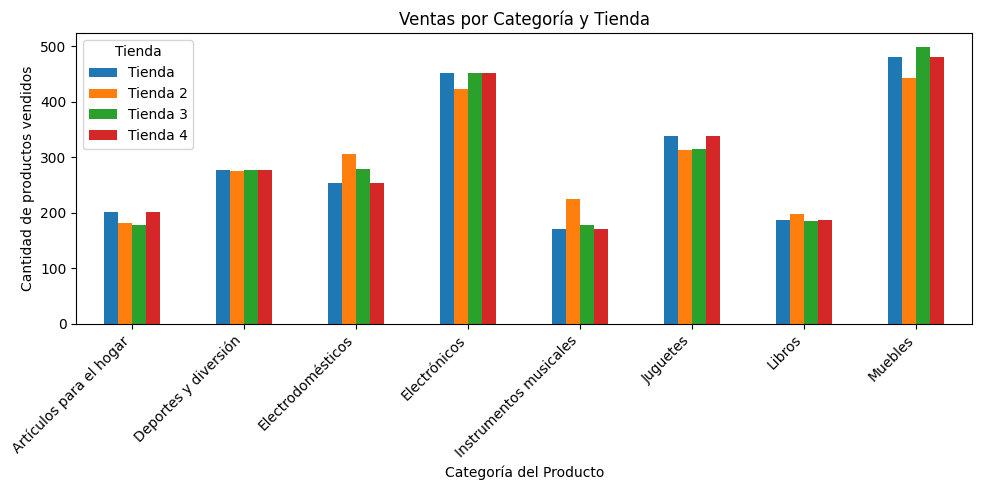

In [142]:
import matplotlib.pyplot as plt

ventas_por_categoria_df.plot(kind='bar', figsize=(10,5))
plt.title('Ventas por Categoría y Tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Categoría del Producto')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

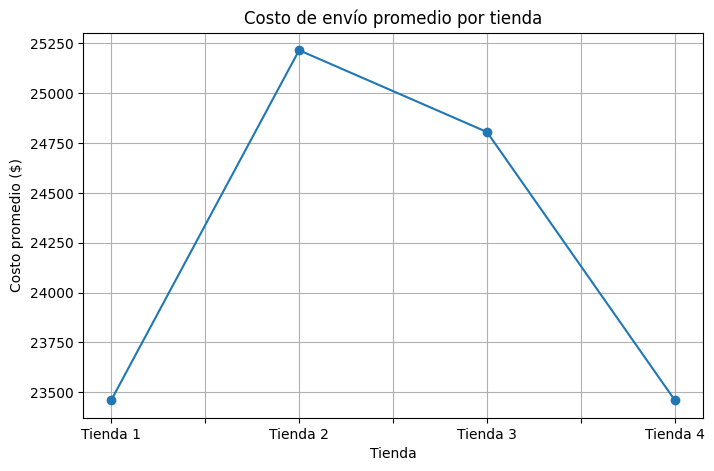

In [144]:
costo_envio_promedio.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo promedio ($)')
plt.xlabel('Tienda')
plt.grid(True)
plt.show()

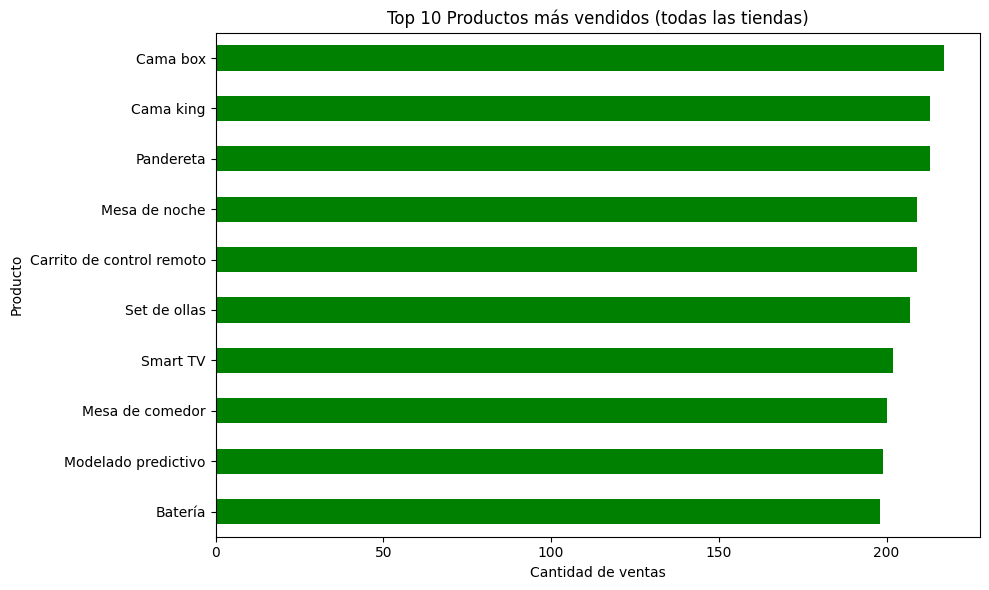

In [148]:
import pandas as pd
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
ventas_producto_total = df.groupby('Producto').size().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt

ventas_producto_total.plot(kind='barh', figsize=(10,6), color='green')
plt.title('Top 10 Productos más vendidos (todas las tiendas)')
plt.xlabel('Cantidad de ventas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


                             **Informe Final**



Recomendación de Tiendas para el Sr. Juan.

                                Introducción:

El presente análisis evalúa el desempeño de cuatro tiendas con el objetivo de recomendar al Sr. Juan cuál es la mejor opción para vender sus productos. Se consideraron factores clave como ingresos totales, ventas por categoría y producto, calificaciones promedio de los clientes y costos de envío. La combinación de estos indicadores permitirá tomar una decisión informada, sustentada en datos cuantitativos y visualizaciones generadas.

                                 Desarrollo

---

1. Ingresos Totales:

---

Los ingresos totales reflejan el volumen y valor de ventas de cada tienda:






Tienda 1: $1.038.375.700

Tienda 2: $1.116.343.500

Tienda 3: $1.098.019.600

Tienda 4: $1.038.375.700


La suma total entre todas las tiendas es de **$4.291.114.500**, mostrando un mercado significativo entre los cuatro puntos de venta.

---

2. Ventas por Categoría:

---

Ventas por Categoría:

                                                     
Artículos para el hogar: 760

Deportes y diversión: 1106

Electrodomésticos: 1091

Electrónicos: 1775

Instrumentos musicales: 741

Juguetes: 1304

Libros   :756

Muebles: 1901

---

3. Calificaciones Promedio de Clientes:


---

Tienda 1: 23.459,46

Tienda 2: 25.216,24

Tienda 3: 24.805,68

Tienda 4: 23.459,46

Esto indica una ligera ventaja en satisfacción para la Tienda 2 y 3.

---

4. Productos Más y Menos Vendidos

---
Tienda 1:



Más vendido: Cama box (62 ventas)

Menos vendido: Guitarra eléctrica (33 ventas)

Tienda 2:

Más vendido: Iniciando en programación (65 ventas)

Menos vendido: Juego de mesa (32 ventas)

Tienda 3:

Más vendido: Kit de bancas (57 ventas)

Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:

Más vendido: Cama box (62 ventas)

Menos vendido: Guitarra eléctrica (33 ventas)

---

5. Costo de Envío Promedio

---
Los costos promedio de envío por tienda fueron:

Tienda 1: 23.459,46

Tienda 2: 25.216,24

Tienda 3: 24.805,68

Tienda 4: 23.459,46

                          Conclusión y Recomendación


Basándonos en el análisis, la Tienda 2 es la opción más recomendable para que el Sr. Juan dirija sus ventas. Esta tienda presenta:

El mayor ingreso total, lo que indica un mercado más amplio o ventas de mayor valor.

Buen desempeño en calificaciones promedio, reflejando una buena satisfacción de clientes.

Un costo de envío promedio competitivo.

Ventas diversificadas y sólidas en las categorías principales.

Aunque las demás tiendas también tienen fortalezas, la Tienda 2 combina los factores de ingresos, satisfacción y costos de manera más equilibrada, aumentando las probabilidades de éxito.


